<a href="https://colab.research.google.com/github/rocket0l4/ML-files/blob/main/Ada_Boost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [31]:
df = pd.DataFrame()

In [32]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [33]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


#As we can see it's like more non-linear type dataset..

<Axes: xlabel='X1', ylabel='X2'>

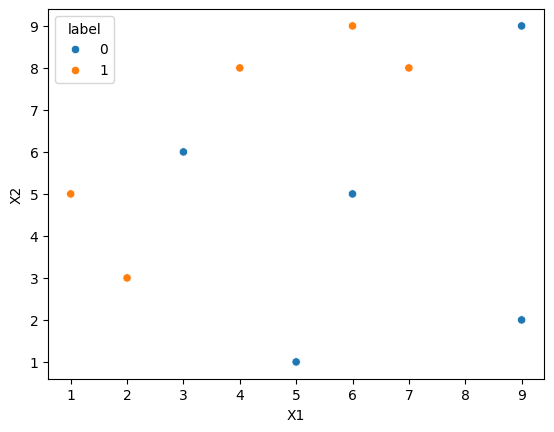

In [34]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

#Assigning the weights for every row, as we need in the Ada Boost

In [35]:
df['weights'] = 1/df.shape[0]

In [36]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [37]:
from sklearn.tree import DecisionTreeClassifier

#In Ada boost the max_depth we use is known as Decision Stumps...

In [38]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [39]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [40]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

In [41]:
# dt1 = DecisionTreeClassifier(max_depth=1)

In [42]:
# X = df.iloc[:,0:2].values
# y = df.iloc[:,2].values

In [43]:
# dt1.fit(X,y)

#Decison Stumps

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.625, 0.5, '  False')]

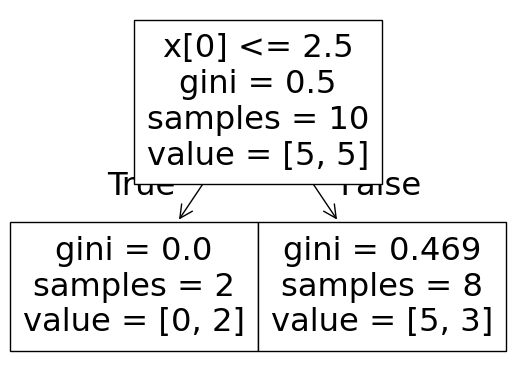

In [44]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

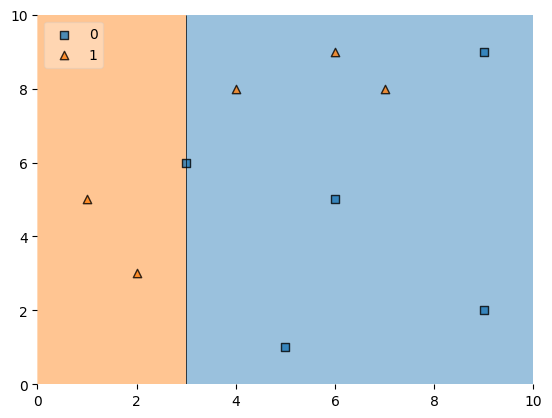

In [45]:
plot_decision_regions(X,y,clf = dt1,legend=2)

In [46]:
df['y_pred'] = dt1.predict(X)

In [47]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


#Caluclating the error,so basically we create a error function...

In [79]:
def calulate_model_weight(error):
  return 0.5*np.log((1-error)/(error+0.000001)) # Used 0.0000001 if error is 0 in that case this code run correctly..

#Caluclating the alpha1 for first model...

In [49]:
alpha1 = calulate_model_weight(0.3)
alpha1

0.42364893019360184

#So the next step is where the mis-classification will occure we simply increase in the weight and decrease the weight in the Correctly classified..

# So due to this we tell the error of corrent model to another model...

In [50]:
def update_row_weights(row,alpha=0.423):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [51]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,8,1,0.1,0,0.152653
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152653
6,6,5,0,0.1,0,0.065508
7,7,8,1,0.1,0,0.152653
8,9,9,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508


In [52]:
# df = df.drop(['update_row_weights','update_weights'],axis=1)

In [53]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,8,1,0.1,0,0.152653
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152653
6,6,5,0,0.1,0,0.065508
7,7,8,1,0.1,0,0.152653
8,9,9,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508


In [54]:
df['updated_weights'].sum()

0.9165153319682015

# so now if we see the sum of all the updated_weights are less the 1, so we need to normalized it...

In [55]:
df['normalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [56]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,0,0.065508,0.071475
3,4,8,1,0.1,0,0.152653,0.166559
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,0,0.152653,0.166559
6,6,5,0,0.1,0,0.065508,0.071475
7,7,8,1,0.1,0,0.152653,0.166559
8,9,9,0,0.1,0,0.065508,0.071475
9,9,2,0,0.1,0,0.065508,0.071475


In [57]:
df['normalized_weights'].sum()

1.0

#Creating Upper range..

In [58]:
df['cumsum_upper'] = np.cumsum(df['normalized_weights'])

In [59]:
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']

In [60]:
df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,0,0.065508,0.142950,0.214425
3,4,8,1,0.1,0,0.152653,0.214425,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,0,0.152653,0.452458,0.619017
6,6,5,0,0.1,0,0.065508,0.619017,0.690492
7,7,8,1,0.1,0,0.152653,0.690492,0.857050
8,9,9,0,0.1,0,0.065508,0.857050,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


#Next we need to create new dataset,,



In [61]:
def create_new_dataset(df):
  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

In [62]:
index_values = create_new_dataset(df)

#Up-Sampling

In [64]:
index_values

[4, 7, 5, 1, 0, 4, 3, 7, 7, 5]

In [65]:
second_df = df.iloc[index_values,[0,1,2,3]]

In [66]:
second_df

,X1,X2,label,weights
4,5,1,0,0.1
7,7,8,1,0.1
5,6,9,1,0.1
1,2,3,1,0.1
0,1,5,1,0.1
4,5,1,0,0.1
3,4,8,1,0.1
7,7,8,1,0.1
7,7,8,1,0.1
5,6,9,1,0.1


In [67]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [69]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [71]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.0\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.625, 0.5, '  False')]

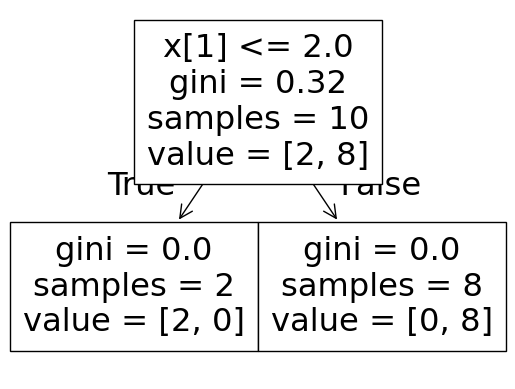

In [72]:
plot_tree(dt2)

<Axes: >

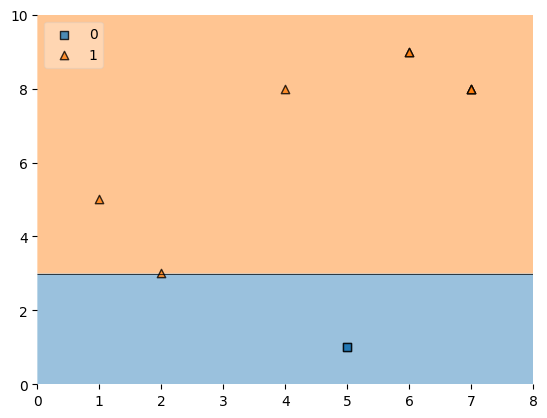

In [73]:
plot_decision_regions(X,y,clf=dt2,legend=2)

In [74]:
second_df['y_pred'] = dt2.predict(X)

In [75]:
second_df

,X1,X2,label,weights,y_pred
4,5,1,0,0.1,0
7,7,8,1,0.1,1
5,6,9,1,0.1,1
1,2,3,1,0.1,1
0,1,5,1,0.1,1
4,5,1,0,0.1,0
3,4,8,1,0.1,1
7,7,8,1,0.1,1
7,7,8,1,0.1,1
5,6,9,1,0.1,1


In [81]:
alpha2 = calulate_model_weight(0.1)

In [78]:
alpha2

1.0986122886681098

In [82]:
def update_row_weights(row,alpha = 1.09):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [83]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)

In [84]:
second_df

,X1,X2,label,weights,y_pred,updated_weights
4,5,1,0,0.1,0,0.033622
7,7,8,1,0.1,1,0.033622
5,6,9,1,0.1,1,0.033622
1,2,3,1,0.1,1,0.033622
0,1,5,1,0.1,1,0.033622
4,5,1,0,0.1,0,0.033622
3,4,8,1,0.1,1,0.033622
7,7,8,1,0.1,1,0.033622
7,7,8,1,0.1,1,0.033622
5,6,9,1,0.1,1,0.033622


#Normalize

In [85]:
second_df['normalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [86]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
4,5,1,0,0.1,0,0.033622,0.1
7,7,8,1,0.1,1,0.033622,0.1
5,6,9,1,0.1,1,0.033622,0.1
1,2,3,1,0.1,1,0.033622,0.1
0,1,5,1,0.1,1,0.033622,0.1
4,5,1,0,0.1,0,0.033622,0.1
3,4,8,1,0.1,1,0.033622,0.1
7,7,8,1,0.1,1,0.033622,0.1
7,7,8,1,0.1,1,0.033622,0.1
5,6,9,1,0.1,1,0.033622,0.1


In [87]:
second_df['normalized_weights'].sum()

0.9999999999999999

In [88]:
second_df['cumsum_upper'] = np.cumsum(second_df['normalized_weights'])

In [89]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['normalized_weights']

In [91]:
second_df[['X1','X2','label','weights','y_pred','normalized_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,normalized_weights,cumsum_lower,cumsum_upper
4,5,1,0,0.1,0,0.1,0.0,0.1
7,7,8,1,0.1,1,0.1,0.1,0.2
5,6,9,1,0.1,1,0.1,0.2,0.3
1,2,3,1,0.1,1,0.1,0.3,0.4
0,1,5,1,0.1,1,0.1,0.4,0.5
4,5,1,0,0.1,0,0.1,0.5,0.6
3,4,8,1,0.1,1,0.1,0.6,0.7
7,7,8,1,0.1,1,0.1,0.7,0.8
7,7,8,1,0.1,1,0.1,0.8,0.9
5,6,9,1,0.1,1,0.1,0.9,1.0


In [92]:
index_values = create_new_dataset(second_df)

In [93]:
third_df = second_df.iloc[index_values,[0,1,2,3]]

In [94]:
third_df

,X1,X2,label,weights
0,1,5,1,0.1
4,5,1,0,0.1
7,7,8,1,0.1
7,7,8,1,0.1
4,5,1,0,0.1
7,7,8,1,0.1
0,1,5,1,0.1
7,7,8,1,0.1
7,7,8,1,0.1
7,7,8,1,0.1


In [95]:
dt3 = DecisionTreeClassifier(max_depth=1)

In [96]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [97]:
dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

<Axes: >

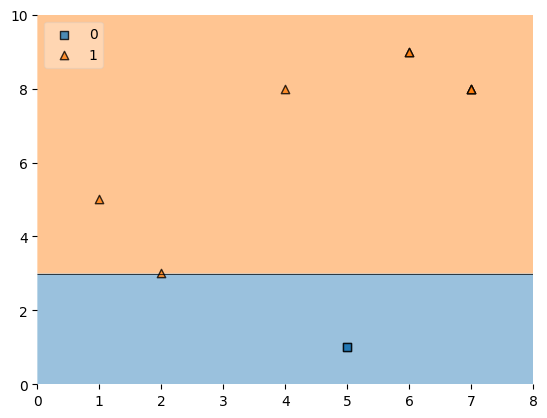

In [98]:
plot_decision_regions(X, y, clf=dt3, legend=2)

In [99]:
third_df['y_pred'] = dt3.predict(X)

In [100]:
third_df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,0
4,5,1,0,0.1,1
7,7,8,1,0.1,1
7,7,8,1,0.1,1
4,5,1,0,0.1,1
7,7,8,1,0.1,0
0,1,5,1,0.1,1
7,7,8,1,0.1,1
7,7,8,1,0.1,1
7,7,8,1,0.1,1


In [104]:
alpha3 = calulate_model_weight(0.7)
alpha3

-0.42364964447880576

In [105]:
print(alpha1,alpha2,alpha3)

0.42364893019360184 1.0986072886931095 -0.42364964447880576


#Prediction

In [106]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1])

In [107]:
dt2.predict(query)

array([1])

In [108]:
dt3.predict(query)

array([1])

In [109]:
alpha1*1 + alpha2*(1) + alpha3*(1)

1.0986065744079057

In [110]:
np.sign(1.09)

1.0

In [111]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([0])

In [112]:
dt2.predict(query)

array([1])

In [113]:
dt3.predict(query)

array([1])

In [114]:
alpha1*(1) + alpha2*(-1) + alpha3*(-1)


-0.25130871402070193

In [115]:
np.sign(-0.25)

-1.0